In [1]:
import plotly.io as pio
pio.renderers.default = "notebook"
from collections import defaultdict
import collections

In [2]:
import pandas as pd

deaths_all_github = pd.read_csv('deatheverestall_himalayandatabasesubset_github.csv')
deaths_kaggle = pd.read_csv('mount_everest_deaths_kaggle.csv')
#ascent_opennepaldata = pd.read_csv('mountaineeringfacts2018_opennepaldata.csv')
ascent_kaggle = pd.read_csv("Mt_Everest_Ascent_Data_kaggle.csv")

In [3]:
#eliminate overlaps between ascent names and death names and then process. Although, there are like 10k ascent and common names were 80ish. 

In [4]:
import re
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

First step should be aggregate all the death info, see how much is common and how much is different. Then combine the summit info. 

In [5]:
#open nepal data doesn't tell if these were successful summits or not though
# yasuko died, but is in both ascent datasets, need to cross check the names in the death datasets

In [6]:
#direction_on_route=[]
#for i in deaths_all_github["deathclsnt"]:
#    if re.findall[r"asc"]
#    i = re.sub("Route preparation")
death_dir = collections.Counter(deaths_all_github["deathclsnt"])
print(death_dir)

Counter({'Route preparation': 121, 'Descending from summit bid': 113, 'Death at BC': 34, 'Ascending in summit bid': 24, 'Expedition evacuation': 12, 'Death enroute BC': 6})


In [7]:
import pandas as pd

# Load the data from the provided files
ascent_data = pd.read_csv('Mt_Everest_Ascent_Data_kaggle.csv')
death_data_github = pd.read_csv('deatheverestall_himalayandatabasesubset_github.csv')
death_data_kaggle = pd.read_csv('mount_everest_deaths_kaggle.csv')

# Standardize column names to remove potential leading/trailing spaces or special characters
ascent_data.columns = ascent_data.columns.str.strip()
death_data_github.columns = death_data_github.columns.str.strip()
death_data_kaggle.columns = death_data_kaggle.columns.str.strip()

# Extract the "Name" column from the death datasets (handling potential special characters in column names)
#death_names_github = death_data_github['name'].dropna().str.strip().unique()
# Standardize column names to remove potential leading/trailing spaces or special characters

def clean_name(name):
    return re.sub(r"\(.*\).*", "", name).strip()

# Extract the "Name" column from the death datasets (handling potential special characters in column names)
death_names_github = death_data_github['name'].dropna().str.strip().apply(clean_name).unique()
death_names_kaggle = death_data_kaggle['Name'].dropna().str.strip().apply(clean_name).unique()

# Combine the names from both death datasets
death_names_combined = set(death_names_github).union(death_names_kaggle)

# Create a dictionary of expid and Name for rows in the GitHub dataset where "Sherpa" appears in the name
sherpa_dict_github = death_data_github[death_data_github['name'].str.contains("Sherpa", na=False)].set_index('expid')['name'].to_dict()

# Remove rows from ascent data where the cleaned "Name" column matches any name in death_names_combined
initial_row_count = len(ascent_data)
ascent_data = ascent_data[~ascent_data['Name'].str.strip().apply(clean_name).isin(death_names_combined)]

# Remove rows from ascent data where the "Dth" column has 'Y'
ascent_data = ascent_data[ascent_data['Dth'] != 'Y']

# Create a list of names for rows in the ascent dataset where "Sherpa" appears in the name (without cleaning the name)
sherpa_list_ascent = ascent_data[ascent_data['Name'].str.contains("Sherpa", na=False)]['Name'].tolist()

# Calculate the total rows removed
total_rows_removed = initial_row_count - len(ascent_data)

# Save the filtered dataset to a new file
ascent_data.to_csv('Filtered_Mt_Everest_Ascent_Data_v2.csv', index=False)

# Output the results
total_rows_removed, sherpa_dict_github, sherpa_list_ascent


(1044,
 {'EVER-221-01': 'Temba Sherpa',
  'EVER-523-01': 'Mingma Dorje Sherpa',
  'EVER-621-01': 'Nawang Tshering Sherpa',
  'EVER-693-02': 'Phu Dorje Sherpa (Khumjung)',
  'EVER-701-01': 'Tshering Tarke Sherpa',
  'EVER-701-02': 'Kyak Tsering Sherpa (Namche Bazar)',
  'EVER-733-01': 'Jangbu Sherpa (Namche Bazar)',
  'EVER-743-01': 'Sanu Wangel Sherpa (Taksindu)',
  'EVER-753-01': 'Mingma Nuru Sherpa (Khunde)',
  'EVER-781-02': 'Dawa Nuru Sherpa (Thami)',
  'EVER-791-01': 'Ang Phu Sherpa (Khumjung)',
  'EVER-803-01': 'Nawang Kersang Sherpa',
  'EVER-823-02': 'Pasang Sana Sherpa (Khunde)',
  'EVER-823-01': 'Nima Dorje Sherpa',
  'EVER-833-05': 'Pasang Temba Sherpa',
  'EVER-841-02': 'Ang Rinji Sherpa (Rimijung)',
  'EVER-843-02': 'Ang Dorje Sherpa (Thamo)',
  'EVER-863-02': 'Gyalu Sherpa',
  'EVER-863-03': 'Dawa Norbu Sherpa (Yilajung)',
  'EVER-864-02': 'Tsuttin Dorji Sherpa',
  'EVER-883-10': 'Pasang Temba Sherpa (Makalu-Barun)',
  'EVER-884-01': 'Lhakpa Dorje (Ang Lhakpa) Sherpa (Khu

In [8]:
ascent_data['Yr/Seas'] = ascent_data['Yr/Seas'].str.extract(r'(\d{4})')
def filter_by_month(data, month):
    return data[data['Date'].str.contains(f"-{month}", na=False)]

# Example: Filter rows for the month of May
may_data = filter_by_month(ascent_data, 'May')

In [9]:
print(len(sherpa_dict_github),len(sherpa_list_ascent))

66 3551


In [10]:
# Debug: Check for empty or missing values in critical columns
ascent_data = pd.read_csv('Filtered_Mt_Everest_Ascent_Data_v2.csv')

print("Missing values:\n", ascent_data[['Yr/Seas', 'Date']].isnull().sum())
ascent_data['Yr/Seas'] = ascent_data['Yr/Seas'].str.extract(r'(\d{4})')
# Extract Year from Yr/Seas
ascent_data['Year'] = ascent_data['Yr/Seas']

# Extract Month from Date (only valid rows)
ascent_data['Month'] = ascent_data['Date'].str.extract(r'-(\w+)', expand=False)

# Debug: Check extracted Year and Month
print("Extracted Year and Month:\n", ascent_data[['Year', 'Month']].dropna().head())

# Remove rows where Year or Month is missing
ascent_data = ascent_data.dropna(subset=['Year', 'Month'])

# Convert months to categorical for proper sorting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ascent_data['Month'] = pd.Categorical(ascent_data['Month'], categories=month_order, ordered=True)

# Debug: Check cleaned data before counting
print("Cleaned Data:\n", ascent_data.head())

# Group by Year and Month, and count the number of unique climbers
climbers_per_month_year = ascent_data.groupby(['Year', 'Month']).size().reset_index(name='ClimberCount')

# Debug: Check grouped data
print("Grouped Climber Counts:\n", climbers_per_month_year)

# Pivot the data for ridgeline plotting
pivot_data = climbers_per_month_year.pivot(index='Year', columns='Month', values='ClimberCount').fillna(0)

# Debug: Check pivoted data
print("Pivot Data:\n", pivot_data)

Missing values:
 Yr/Seas    0
Date       0
dtype: int64
Extracted Year and Month:
    Year Month
0  1953   May
1  1953   May
2  1956   May
3  1956   May
4  1956   May
Cleaned Data:
    Peak                     Name Yr/Seas    Date   Time  Citizenship Sex  Age  \
0  EVER          Tenzing Norgay     1953  29-May  11:30        India   M   39   
1  EVER  Edmund Percival Hillary    1953  29-May  11:30  New Zealand   M   33   
2  EVER          Juerg P. Marmet    1956  23-May  14:00  Switzerland   M   28   
3  EVER            Ernst Schmied    1956  23-May  14:00  Switzerland   M   31   
4  EVER       Adolf (Dolf) Reist    1956  24-May  11:00  Switzerland   M   35   

  Oxy Dth   Host  Year Month  
0   Y   .  Nepal  1953   May  
1   Y   .  Nepal  1953   May  
2   Y   .  Nepal  1956   May  
3   Y   .  Nepal  1956   May  
4   Y   .  Nepal  1956   May  
Grouped Climber Counts:
      Year Month  ClimberCount
0    1953   Jan             0
1    1953   Feb             0
2    1953   Mar             0


In [12]:
pivot_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1953,0,0,0,0,2,0,0,0,0,0,0,0
1956,0,0,0,0,4,0,0,0,0,0,0,0
1960,0,0,0,0,3,0,0,0,0,0,0,0
1963,0,0,0,0,6,0,0,0,0,0,0,0
1965,0,0,0,0,8,0,0,0,0,0,0,0
1970,0,0,0,0,4,0,0,0,0,0,0,0
1973,0,0,0,0,8,0,0,0,0,1,0,0
1975,0,0,0,0,10,0,0,0,3,0,0,0
1976,0,0,0,0,2,0,0,0,0,2,0,0


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot

#'ascent_data' already has 'Year' and 'Month' columns 
ascent_data = pd.read_csv('Filtered_Mt_Everest_Ascent_Data_v2.csv')

print("Missing values:\n", ascent_data[['Yr/Seas', 'Date']].isnull().sum())
ascent_data['Yr/Seas'] = ascent_data['Yr/Seas'].str.extract(r'(\d{4})')
# Extract Year from Yr/Seas
ascent_data['Year'] = ascent_data['Yr/Seas']

# Extract Month from Date (only valid rows)
ascent_data['Month'] = ascent_data['Date'].str.extract(r'-(\w+)', expand=False)


# Remove rows where Year or Month is missing
#ascent_data = ascent_data.dropna(subset=['Year', 'Month'])



# 1. Convert Month to numeric
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
ascent_data['MonthNum'] = ascent_data['Month'].map(month_map)

# Drop missing values if any remain
ascent_data = ascent_data.dropna(subset=['Year', 'MonthNum'])

# Convert Year to integer (just to be safe for sorting)
ascent_data['Year'] = ascent_data['Year'].astype(int)

# Aggregate and then expand data so each climber is a separate row corresponding to their month
# First get the counts
climbers_per_month_year = ascent_data.groupby(['Year', 'MonthNum']).size().reset_index(name='ClimberCount')

# Now expand the data so each climber count corresponds to multiple rows
expanded_rows = []
for _, row in climbers_per_month_year.iterrows():
    year = row['Year']
    month_num = row['MonthNum']
    count = int(row['ClimberCount'])
    # Add 'count' rows with the same month_num and year
    for _ in range(count):
        expanded_rows.append([year, month_num])

long_form_data = pd.DataFrame(expanded_rows, columns=['Year', 'MonthNum'])


Missing values:
 Yr/Seas    0
Date       0
dtype: int64


In [24]:
# Assume 'ascent_data' already has 'Year' and 'Month' columns as in your code.
ascent_data = pd.read_csv('Filtered_Mt_Everest_Ascent_Data_v2.csv')

print("Missing values:\n", ascent_data[['Yr/Seas', 'Date']].isnull().sum())
ascent_data['Yr/Seas'] = ascent_data['Yr/Seas'].str.extract(r'(\d{4})')
# Extract Year from Yr/Seas
ascent_data['Year'] = ascent_data['Yr/Seas']

# Extract Month from Date (only valid rows)
ascent_data['Month'] = ascent_data['Date'].str.extract(r'-(\w+)', expand=False)

# Debug: Check extracted Year and Month
#print("Extracted Year and Month:\n", ascent_data[['Year', 'Month']].dropna().head())

# Remove rows where Year or Month is missing
#ascent_data = ascent_data.dropna(subset=['Year', 'Month'])



# 1. Convert Month to numeric
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
ascent_data['MonthNum'] = ascent_data['Month'].map(month_map)

# Drop missing values if any remain
ascent_data = ascent_data.dropna(subset=['Year', 'MonthNum'])

# Convert Year to integer (just to be safe for sorting)
ascent_data['Year'] = ascent_data['Year'].astype(int)
ascent_data.head()
test_df = ascent_data[["Year","MonthNum", "Month"]]

Missing values:
 Yr/Seas    0
Date       0
dtype: int64


In [15]:
test_df.head()

,Year,MonthNum,Month
0,1953,5,May
1,1953,5,May
2,1956,5,May
3,1956,5,May
4,1956,5,May


/opt/homebrew/lib/python3.11/site-packages/joypy/joyplot.py:435: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.

/var/folders/b0/xl01ls510lj26v6bfgyvv3_r0000gn/T/ipykernel_40976/118609040.py:68: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



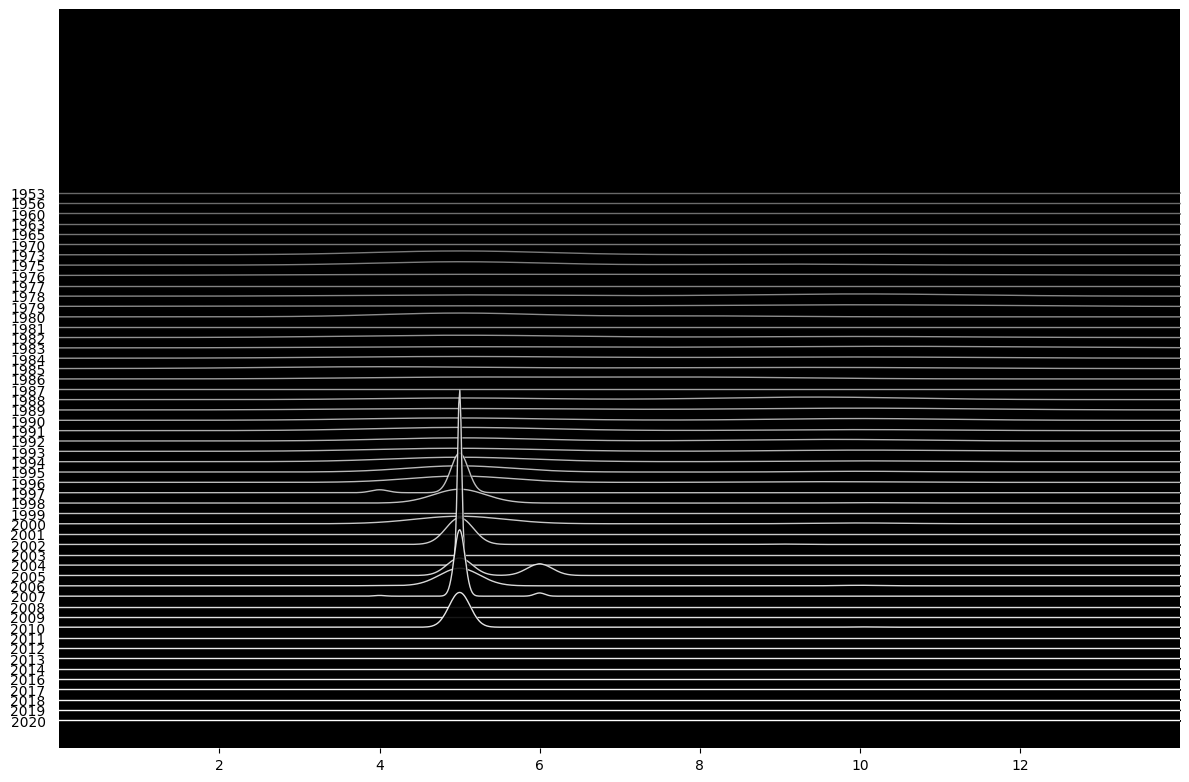

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joypy import joyplot

# Assume 'long_form_data' already exists:
# long_form_data has 'Year' and 'MonthNum' columns, with one row per climber.

# Add jitter to MonthNum for KDE smoothing
long_form_data['MonthNum_jitter'] = long_form_data['MonthNum'] + np.random.normal(0, 0.1, len(long_form_data))

# Reverse the order of years so the latest year appears at the bottom
long_form_data = long_form_data.sort_values(by='Year', ascending=True)

# Plot the ridgeline plot for all years
fig, ax = plt.subplots(figsize=(12, 8))
'''
# Create the joyplot
fig, axes_joy = joyplot(
    data=long_form_data,
    by='Year',
    column='MonthNum_jitter',
    hist=False,
    overlap=4.0,  # Adjust overlap for better spacing
    linewidth=1,
    linecolor='w',
    color='black',  # Black ridges
    alpha=0.9,  # Set opacity
    background='black',
    fade=True,
    figure=fig,
    ax=ax,
    kind='kde',  # Use KDE for smooth ridges
    ylabels=True,  # Ensure y-axis labels are displayed
    ylim='own',
    xlim='own'
)
'''
# Create the joyplot
fig, axes_joy = joyplot(
    data=test_df,
    by='Year',
    column='MonthNum',
    hist=False,
    overlap=3,  # Adjust overlap for better spacing
    linewidth=1,
    linecolor='w',
    color='black',  # Black ridges
    alpha=0.9,  # Set opacity
    background='black',
    fade=True,
    figure=fig,
    ax=ax, 
    kind='kde',
    ylabels=True,  # Ensure y-axis labels are displayed
    xlabels=True,
)

# Customizing the plot
ax.set_title("Ridgeline Plot of Climbers by Month and Year", fontsize=16, pad=10)
ax.set_xticks(range(1, 13))  # Limit x-axis to 12 ticks (1-12)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
ax.set_xlabel("Month")
ax.set_ylabel("Year")
#ax.invert_yaxis()  # Ensure the latest year is at the bottom

# Tighten layout and show the plot
plt.tight_layout()
plt.show()


/opt/homebrew/lib/python3.11/site-packages/joypy/joyplot.py:435: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.

/var/folders/b0/xl01ls510lj26v6bfgyvv3_r0000gn/T/ipykernel_40976/2249179527.py:55: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



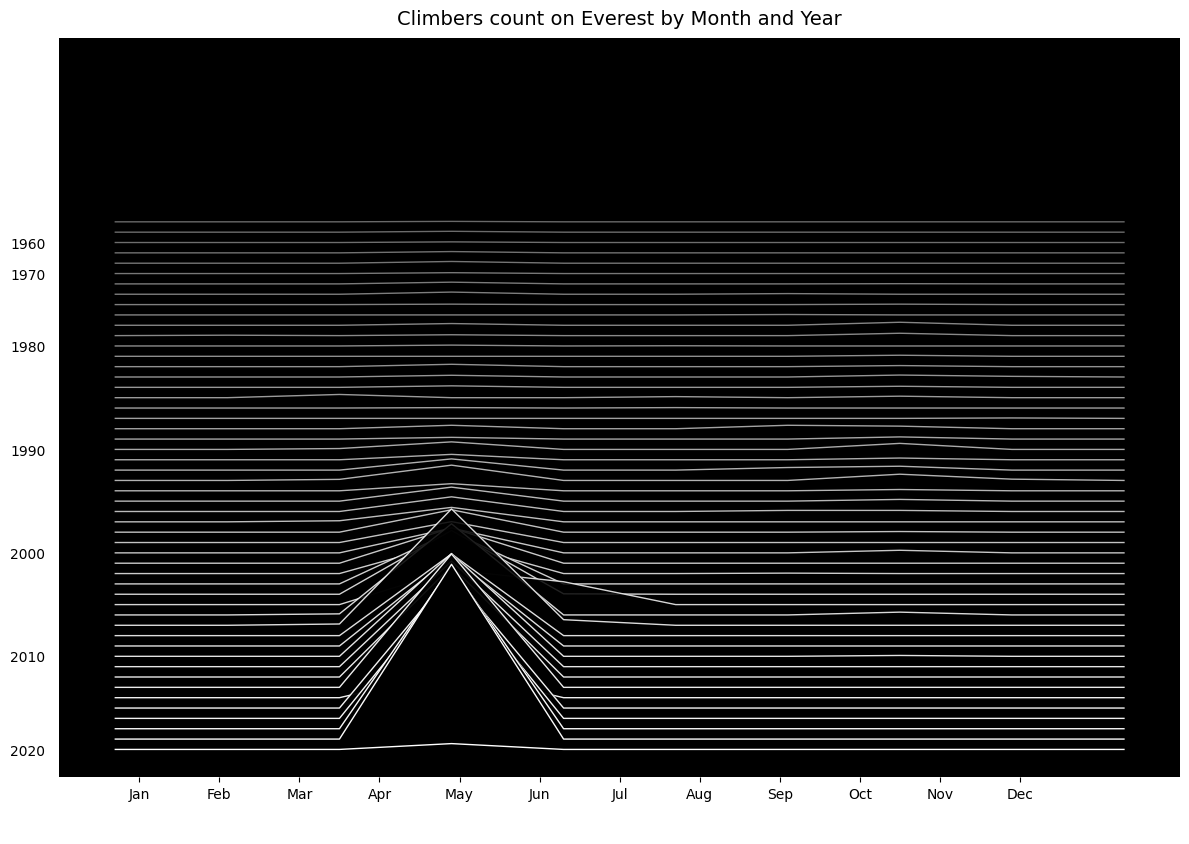

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joypy import joyplot

# Assume 'long_form_data' already exists:
# long_form_data has 'Year' and 'MonthNum' columns, with one row per climber.

# Add jitter to MonthNum for KDE smoothing
long_form_data['MonthNum_jitter'] = long_form_data['MonthNum'] + np.random.normal(0, 0.1, len(long_form_data))

# Reverse the order of years so the latest year appears at the bottom
long_form_data = long_form_data.sort_values(by='Year', ascending=True)
decades = [
    int(y) if y % 10 == 0 or y == 2020 else None 
    for y in long_form_data['Year'].unique()
]

# Create the figure and axis for the joyplot
fig, ax = plt.subplots(figsize=(12, 8))
joyplot(
    data=long_form_data,
    by='Year',
    column='MonthNum',
    hist=False,
    overlap=3,  # Adjust overlap for better spacing
    linewidth=1,
    linecolor='w',
    color='black',  # Black ridges
    alpha=0.9,  # Set opacity
    background='black',
    fade=True,
    figure=fig,
    ax=ax, 
    kind='counts',
    labels=decades,
    ylim='max', 
    tails=0.2, 
    ylabels=True,  # Ensure y-axis labels are displayed
    xlabels=True,
)

# Customizing the plot using plt.gca()
current_ax = plt.gca()
current_ax.set_title("Climbers count on Everest by Month and Year", fontsize=14, pad=10)
current_ax.set_xticks(range(1, 13))  # Set x-axis ticks (1-12)
current_ax.set_xticklabels(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
    fontsize=10
)
current_ax.set_xlabel("Month", fontsize=14, color='white', labelpad=10)
current_ax.set_ylabel("Year", fontsize=14, color='white', labelpad=10)

# Improve layout and display the plot
plt.tight_layout()
plt.show()


In [27]:
long_form_data

,Year,MonthNum,MonthNum_jitter
0,1953,5,4.914244
1,1953,5,5.076346
2,1956,5,5.123703
3,1956,5,4.970414
4,1956,5,5.036786
...,...,...,...
9130,2020,5,5.012946
9128,2020,5,5.029958
9125,2020,5,5.060255
9114,2020,5,5.061038
